# **0. Diccionario de datos:**


*   **Default:** Cliente con más de 90 dias sin pagar su prestamo
*   **Prct_uso_tc:** Porcentaje del uso de tarjeta de credito el último mes
*   **Edad:** Edad
*   **Nro_prestao_retrasados:** Numero de prestamos con retraso en el pago de más de 3 meses en los últimos 3 años
*   **Prct_deuda_vs_ingresos:** Ratio de deuda financiera vs ingresos del clientes
*   **Mto_ingreso_mensual:** Monto de ingreso mensual
*   **Nro_prod_financieros_deuda:** Nro de prestamos (incluido creditos vehiculares o hipotecario) y nro de tarjetas de credito ultimo año
*   **Nro_retraso_60dias:** Nro de veces que el cliente se ha retrasado más de 60 dias los últimons 3 años
*   **Nro_creditos_hipotecarios:** Nro de creditos hipotecarios
*   **Nro_retraso_ultm3anios:** Nro de retrasos en pagos de más de 30 dias en los úlitmos 3 años
*   **Nro_dependiente:** Nro de dependientes

















# **1. Importe de librerias y base de datos**





In [406]:
#IMPORTAR LIBRERIAS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode as mod
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from pandas import Index

In [407]:
#CARGAR BASE DE DATOS
df_creditos=pd.read_csv("../data/raw/2_DS_creditos.csv",sep = ";",encoding = 'latin1')

In [408]:
#VISUALIZAR LAS 5 PRIMERAS FILAS DE LA BASE DE DATOS
df_creditos.head(5)

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [409]:
#VISUALIZAR LOS VALORES Y TIPO DE DATO DE CADA COLUMNA
df_creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          150000 non-null  int64  
 1   Default                     150000 non-null  int64  
 2   Prct_uso_tc                 150000 non-null  float64
 3   Edad                        150000 non-null  int64  
 4   Nro_prestao_retrasados      150000 non-null  int64  
 5   Prct_deuda_vs_ingresos      150000 non-null  float64
 6   Mto_ingreso_mensual         120269 non-null  float64
 7   Nro_prod_financieros_deuda  150000 non-null  int64  
 8   Nro_retraso_60dias          150000 non-null  int64  
 9   Nro_creditos_hipotecarios   150000 non-null  int64  
 10  Nro_retraso_ultm3anios      150000 non-null  int64  
 11  Nro_dependiente             146076 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [410]:
#VISUALIZAR EL DETALLE ESTADÍSTICO DE CADA COLUMNA
df_creditos.describe()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


*   **DATO 1:** Se ha identificado que las columnas 'Mto_ingreso_mensual' y 'Nro_dependiente' presentan valores nulos
*   **DATO 2:** La desviación estándar de la columna 'Prct_uso_tc' es muy elevada (No confiable)
*   **DATO 3:** La desviación estándar de la columna 'Prct_deuda_vs_ingresos' es muy elevada (No confiable)





# **2. Tratamiento de valores nulos - Parte 1**

In [411]:
#CUANTIFICAR LOS VALORES NULOS
df_creditos.isna().sum()

ID                                0
Default                           0
Prct_uso_tc                       0
Edad                              0
Nro_prestao_retrasados            0
Prct_deuda_vs_ingresos            0
Mto_ingreso_mensual           29731
Nro_prod_financieros_deuda        0
Nro_retraso_60dias                0
Nro_creditos_hipotecarios         0
Nro_retraso_ultm3anios            0
Nro_dependiente                3924
dtype: int64

In [412]:
#HALLAR LA MODA DE LA 'Nro_dependiente'
mod(df_creditos['Nro_dependiente'])

0.0

In [413]:
#REEMPLAZAR LOS VALORES NULOS CON LA MODA DE LA COLUMNA 'Nro_dependiente'
df_isnull2 = df_creditos['Nro_dependiente'].fillna(0)
df_creditos['Nro_dependiente'] = df_isnull2

In [414]:
#VISUALIZAR EL DETALLE ESTADÍSTICO DEL NUEVO DATASET
df_creditos.describe()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


# **3. Tratamiento de valores atípicos**

In [415]:
#APLICAR OUTLIER CAPPING
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))

    return(x)

In [416]:
#REEMPLAZAR LOS VALORES ATÍPICOS CON LA VARIABLE X DEFINIDA
df_creditos_tratamiento = df_creditos[['Prct_uso_tc']].apply(lambda x: outlier_capping(x))

In [417]:
#VISUALIZAR LOS VALORES REEMPLAZADOS
df_creditos_tratamiento.head(3)

,Prct_uso_tc
0,0.766127
1,0.957151
2,0.658180


In [418]:
#ELIMINAR Y UNIR LOS VALORES GENERADOS DE LA COLUMNA 'Prct_uso_tc'
df_creditos = pd.concat([df_creditos.drop(columns=['Prct_uso_tc']), df_creditos_tratamiento], axis=1,)

In [419]:
#VISUALIZAR LAS 5 PRIMERAS FILAS DEL DATASET
df_creditos.head(5)

,ID,Default,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Prct_uso_tc
0,1,1,45,2,0.802982,9120.0,13,0,6,0,2.0,0.766127
1,2,0,40,0,0.121876,2600.0,4,0,0,0,1.0,0.957151
2,3,0,38,1,0.085113,3042.0,2,1,0,0,0.0,0.658180
3,4,0,30,0,0.036050,3300.0,5,0,0,0,0.0,0.233810
4,5,0,49,1,0.024926,63588.0,7,0,1,0,0.0,0.907239


In [420]:
#REEMPLAZAR LOS VALORES ATÍPICOS CON LA VARIABLE X DEFINIDA
df_creditos_tratamiento2 = df_creditos[['Prct_deuda_vs_ingresos']].apply(lambda y: outlier_capping(y))

In [421]:
#VISUALIZAR LOS VALORES REEMPLAZADOS
df_creditos_tratamiento2.head(3)

,Prct_deuda_vs_ingresos
0,0.802982
1,0.121876
2,0.085113


In [422]:
#ELIMINAR Y UNIR LOS VALORES GENERADOS DE LA COLUMNA 'Prct_deuda_vs_ingresos'
df_creditos = pd.concat([df_creditos.drop(columns=['Prct_deuda_vs_ingresos']), df_creditos_tratamiento2], axis=1,)

In [423]:
#VISUALIZAR LAS 5 PRIMERAS FILAS DEL DATASET
df_creditos.head(5)

,ID,Default,Edad,Nro_prestao_retrasados,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Prct_uso_tc,Prct_deuda_vs_ingresos
0,1,1,45,2,9120.0,13,0,6,0,2.0,0.766127,0.802982
1,2,0,40,0,2600.0,4,0,0,0,1.0,0.957151,0.121876
2,3,0,38,1,3042.0,2,1,0,0,0.0,0.658180,0.085113
3,4,0,30,0,3300.0,5,0,0,0,0.0,0.233810,0.036050
4,5,0,49,1,63588.0,7,0,1,0,0.0,0.907239,0.024926


In [424]:
#REEMPLAZAR LOS VALORES ATÍPICOS CON LA VARIABLE X DEFINIDA
df_creditos_tratamiento3 = df_creditos[['Mto_ingreso_mensual']].apply(lambda z: outlier_capping(z))

In [425]:
#VISUALIZAR LOS VALORES REEMPLAZADOS
df_creditos_tratamiento3.head(3)

,Mto_ingreso_mensual
0,9120.0
1,2600.0
2,3042.0


In [426]:
#ELIMINAR Y UNIR LOS VALORES GENERADOS DE LA COLUMNA 'Prct_deuda_vs_ingresos'
df_creditos = pd.concat([df_creditos.drop(columns=['Mto_ingreso_mensual']), df_creditos_tratamiento3], axis=1,)

In [427]:
#VISUALIZAR LAS 5 PRIMERAS FILAS DEL DATASET
df_creditos.head(5)

,ID,Default,Edad,Nro_prestao_retrasados,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Prct_uso_tc,Prct_deuda_vs_ingresos,Mto_ingreso_mensual
0,1,1,45,2,13,0,6,0,2.0,0.766127,0.802982,9120.0
1,2,0,40,0,4,0,0,0,1.0,0.957151,0.121876,2600.0
2,3,0,38,1,2,1,0,0,0.0,0.658180,0.085113,3042.0
3,4,0,30,0,5,0,0,0,0.0,0.233810,0.036050,3300.0
4,5,0,49,1,7,0,1,0,0.0,0.907239,0.024926,14587.6


In [428]:
#REEMPLAZAR LOS VALORES ATÍPICOS CON LA VARIABLE X DEFINIDA
df_creditos_tratamiento4 = df_creditos[['Nro_prestao_retrasados']].apply(lambda a: outlier_capping(a))

In [429]:
#ELIMINAR Y UNIR LOS VALORES GENERADOS DE LA COLUMNA 'Nro_prestao_retrasados'
df_creditos = pd.concat([df_creditos.drop(columns=['Nro_prestao_retrasados']), df_creditos_tratamiento4], axis=1,)

In [430]:
#REEMPLAZAR LOS VALORES ATÍPICOS CON LA VARIABLE X DEFINIDA
df_creditos_tratamiento5 = df_creditos[['Nro_retraso_60dias']].apply(lambda b: outlier_capping(b))

In [431]:
#ELIMINAR Y UNIR LOS VALORES GENERADOS DE LA COLUMNA 'Nro_prestao_retrasados'
df_creditos = pd.concat([df_creditos.drop(columns=['Nro_retraso_60dias']), df_creditos_tratamiento5], axis=1,)

In [432]:
#REEMPLAZAR LOS VALORES ATÍPICOS CON LA VARIABLE X DEFINIDA
df_creditos_tratamiento6 = df_creditos[['Nro_creditos_hipotecarios']].apply(lambda c: outlier_capping(c))

In [433]:
#ELIMINAR Y UNIR LOS VALORES GENERADOS DE LA COLUMNA 'Nro_prestao_retrasados'
df_creditos = pd.concat([df_creditos.drop(columns=['Nro_creditos_hipotecarios']), df_creditos_tratamiento6], axis=1,)

In [434]:
#REEMPLAZAR LOS VALORES ATÍPICOS CON LA VARIABLE X DEFINIDA
df_creditos_tratamiento7 = df_creditos[['Nro_retraso_ultm3anios']].apply(lambda d: outlier_capping(d))

In [435]:
#ELIMINAR Y UNIR LOS VALORES GENERADOS DE LA COLUMNA 'Nro_prestao_retrasados'
df_creditos = pd.concat([df_creditos.drop(columns=['Nro_retraso_ultm3anios']), df_creditos_tratamiento7], axis=1,)

In [436]:
#VISUALIZAR EL DETALLE ESTADÍSTICO DEL NUEVO DATASET
df_creditos.describe()

,ID,Default,Edad,Nro_prod_financieros_deuda,Nro_dependiente,Prct_uso_tc,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prestao_retrasados,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,120269.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,52.295207,8.452760,0.737413,0.319196,254.635916,6115.362840,0.212873,0.055587,0.968253,0.050693
std,43301.414527,0.249746,14.771866,5.145951,1.107021,0.349481,662.435683,3646.059375,0.523017,0.229123,0.921476,0.219371
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,41.000000,5.000000,0.000000,0.029867,0.175074,3400.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,52.000000,8.000000,0.000000,0.154181,0.366508,5400.000000,0.000000,0.000000,1.000000,0.000000
75%,112500.250000,0.000000,63.000000,11.000000,1.000000,0.559046,0.868254,8249.000000,0.000000,0.000000,2.000000,0.000000
max,150000.000000,1.000000,109.000000,58.000000,20.000000,1.000000,2449.000000,14587.600000,2.000000,1.000000,3.000000,1.000000


# **4. Tratamiento de valores nulos y 0s - Parte 2**

In [437]:
#DEFNICIÓN DE LAS VARIABLES
Variables = ['Default', 'Nro_retraso_60dias', 'Nro_retraso_ultm3anios', 'Edad','Mto_ingreso_mensual','Nro_prod_financieros_deuda','Nro_creditos_hipotecarios','Nro_dependiente','Prct_uso_tc','Prct_deuda_vs_ingresos']

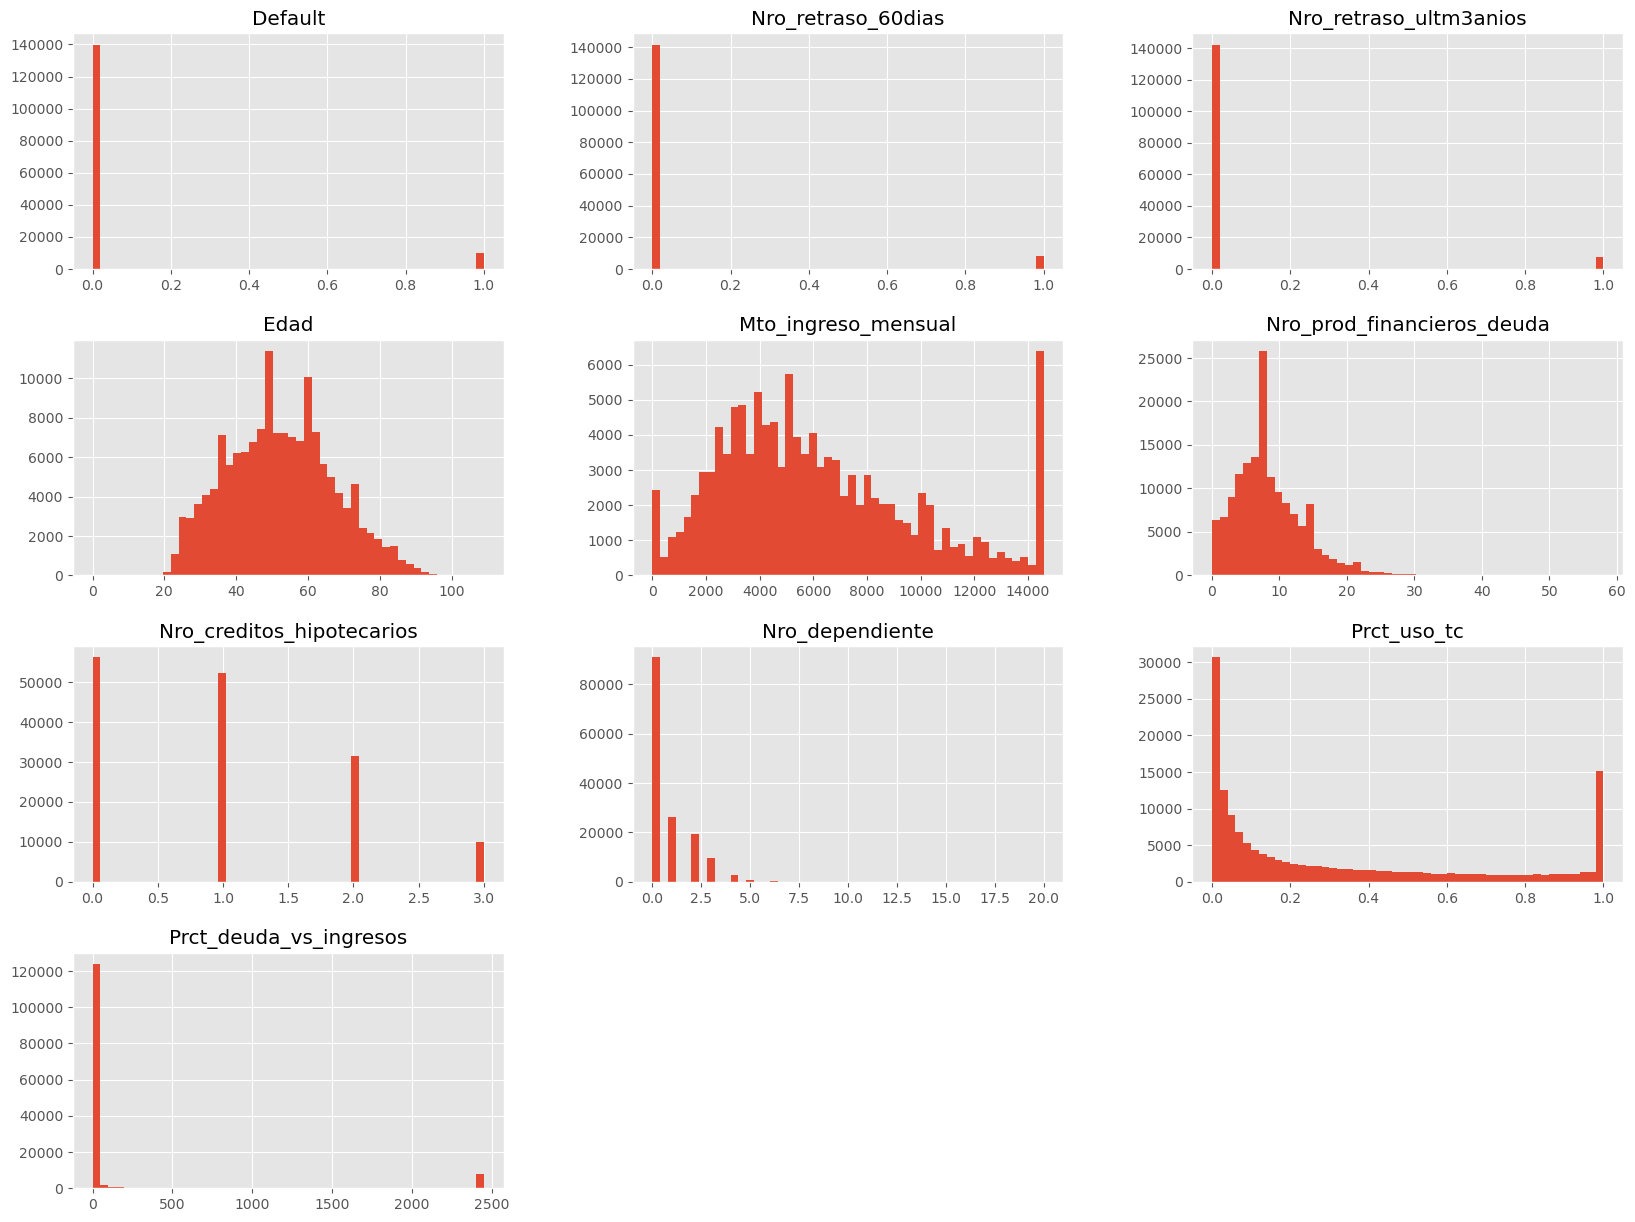

In [438]:
#MUESTRA GRÁFICA DE LAS VARIABLES
df_creditos[Variables].hist(bins = 50, figsize=(20,15))
plt.show()

*   **DATO 5:** La columna "Mto_ingreso_mensual" presenta una gran cantidad de ceros (No pueden haber ingresos con 0)

In [399]:
#CUANTIFICAR LOS VALORES NULOS
df_creditos.isna().sum()

ID                                0
Default                           0
Edad                              0
Nro_prod_financieros_deuda        0
Nro_dependiente                   0
Prct_uso_tc                       0
Prct_deuda_vs_ingresos            0
Mto_ingreso_mensual           29731
Nro_prestao_retrasados            0
Nro_retraso_60dias                0
Nro_creditos_hipotecarios         0
Nro_retraso_ultm3anios            0
dtype: int64

In [439]:
#ARREGLO DE LOS VALORES EN 0 DE LA COLUMNA 'Mto_ingreso_mensual'
def monto_fix(monto):
    if monto==0:
        return None
    return monto

df_creditos['Mto_ingreso_mensual']=df_creditos.apply(lambda x: monto_fix(x['Mto_ingreso_mensual']), axis=1);

In [440]:
#CUANTIFICAR LOS VALORES NULOS
df_creditos.isna().sum()

ID                                0
Default                           0
Edad                              0
Nro_prod_financieros_deuda        0
Nro_dependiente                   0
Prct_uso_tc                       0
Prct_deuda_vs_ingresos            0
Mto_ingreso_mensual           31365
Nro_prestao_retrasados            0
Nro_retraso_60dias                0
Nro_creditos_hipotecarios         0
Nro_retraso_ultm3anios            0
dtype: int64

In [441]:
#HALLAR EL PROMEDIO Y DESVIACIÓN ESTÁNDAR PARA DEFINIR EL INTERVALO DE CONFIANZA
age_avg = df_creditos['Mto_ingreso_mensual'].mean()
age_std = df_creditos['Mto_ingreso_mensual'].std()
age_null_count = df_creditos['Mto_ingreso_mensual'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

conValoresNulos = np.isnan(df_creditos['Mto_ingreso_mensual'])

df_creditos.loc[np.isnan(df_creditos['Mto_ingreso_mensual']), 'Mto_ingreso_mensual'] = age_null_random_list
df_creditos['Mto_ingreso_mensual'] = df_creditos['Mto_ingreso_mensual'].astype(int)
print("Monto Promedio: " + str(age_avg))
print("Desvió Std Monto: " + str(age_std))
print("Intervalo para asignar monto aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))

Monto Promedio: 6199.5918017448475
Desvió Std Monto: 3599.2582885068264
Intervalo para asignar monto aleatoria: 2600 a 9798


In [442]:
#CUANTIFICAR LOS VALORES NULOS
df_creditos.isna().sum()

ID                            0
Default                       0
Edad                          0
Nro_prod_financieros_deuda    0
Nro_dependiente               0
Prct_uso_tc                   0
Prct_deuda_vs_ingresos        0
Mto_ingreso_mensual           0
Nro_prestao_retrasados        0
Nro_retraso_60dias            0
Nro_creditos_hipotecarios     0
Nro_retraso_ultm3anios        0
dtype: int64

In [402]:
#VISUALIZAR LAS 5 PRIMERAS FILAS DEL DATASET
df_creditos.head(5)

,ID,Default,Edad,Nro_prod_financieros_deuda,Nro_dependiente,Prct_uso_tc,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prestao_retrasados,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios
0,1,1,45,13,2.0,0.766127,0.802982,9120,2,0,3,0
1,2,0,40,4,1.0,0.957151,0.121876,2600,0,0,0,0
2,3,0,38,2,0.0,0.658180,0.085113,3042,1,1,0,0
3,4,0,30,5,0.0,0.233810,0.036050,3300,0,0,0,0
4,5,0,49,7,0.0,0.907239,0.024926,14587,1,0,1,0


In [403]:
#VISUALIZAR EL DETALLE ESTADÍSTICO DEL NUEVO DATASET
df_creditos.describe()

,ID,Default,Edad,Nro_prod_financieros_deuda,Nro_dependiente,Prct_uso_tc,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prestao_retrasados,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,52.295207,8.452760,0.737413,0.319196,254.635916,6198.397527,0.212873,0.055587,0.968253,0.050693
std,43301.414527,0.249746,14.771866,5.145951,1.107021,0.349481,662.435683,3339.999062,0.523017,0.229123,0.921476,0.219371
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,41.000000,5.000000,0.000000,0.029867,0.175074,3679.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,52.000000,8.000000,0.000000,0.154181,0.366508,5624.000000,0.000000,0.000000,1.000000,0.000000
75%,112500.250000,0.000000,63.000000,11.000000,1.000000,0.559046,0.868254,8180.000000,0.000000,0.000000,2.000000,0.000000
max,150000.000000,1.000000,109.000000,58.000000,20.000000,1.000000,2449.000000,14587.000000,2.000000,1.000000,3.000000,1.000000


# **5. Evaluación de la variable target**

In [404]:
#CUANTIFICAR LOS VALORES NULOS
df_creditos.isna().sum()

ID                            0
Default                       0
Edad                          0
Nro_prod_financieros_deuda    0
Nro_dependiente               0
Prct_uso_tc                   0
Prct_deuda_vs_ingresos        0
Mto_ingreso_mensual           0
Nro_prestao_retrasados        0
Nro_retraso_60dias            0
Nro_creditos_hipotecarios     0
Nro_retraso_ultm3anios        0
dtype: int64

In [405]:
#VISUALIZAR LA CANTIDAD DE DATOS POR CADA VALOR DE LA COLUMNA 'DEFAULT'
df_creditos.groupby('Default').size()

Default
0    139974
1     10026
dtype: int64

<Axes: xlabel='Default', ylabel='count'>

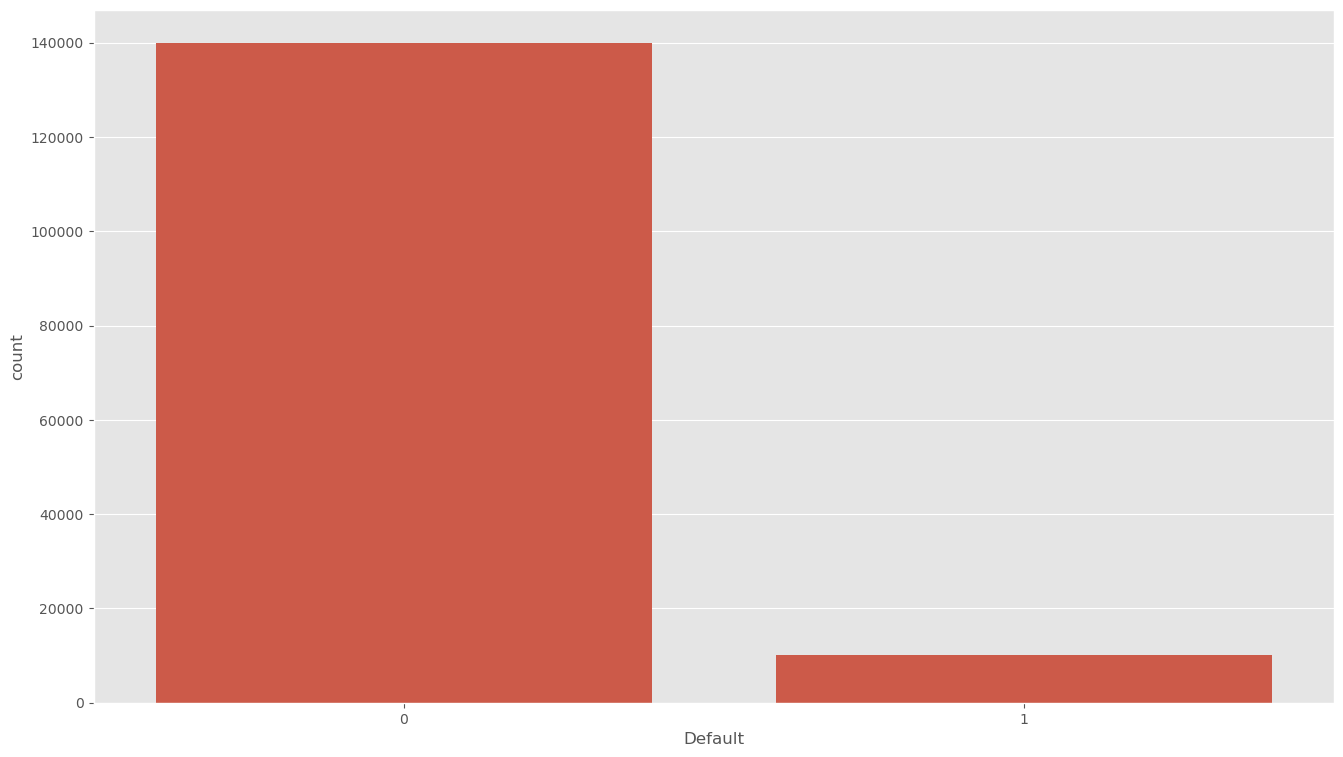

In [284]:
#REPRESENTAR EN UN GRÁFICO DE BARRAS LOS VALORES DE LA COLUMNA 'DEFAULT'
sns.countplot(x='Default',data=df_creditos)

In [285]:
#DISTRIBUCIÓN DE LA VARIABLE TARGET
round(df_creditos.Default.value_counts(normalize=True),4)

Default
0    0.9332
1    0.0668
Name: proportion, dtype: float64

**DATO 6:** Sólo el 6% de los clientes han sobrepasado los 90 días sin pegar su préstamo

<Axes: >

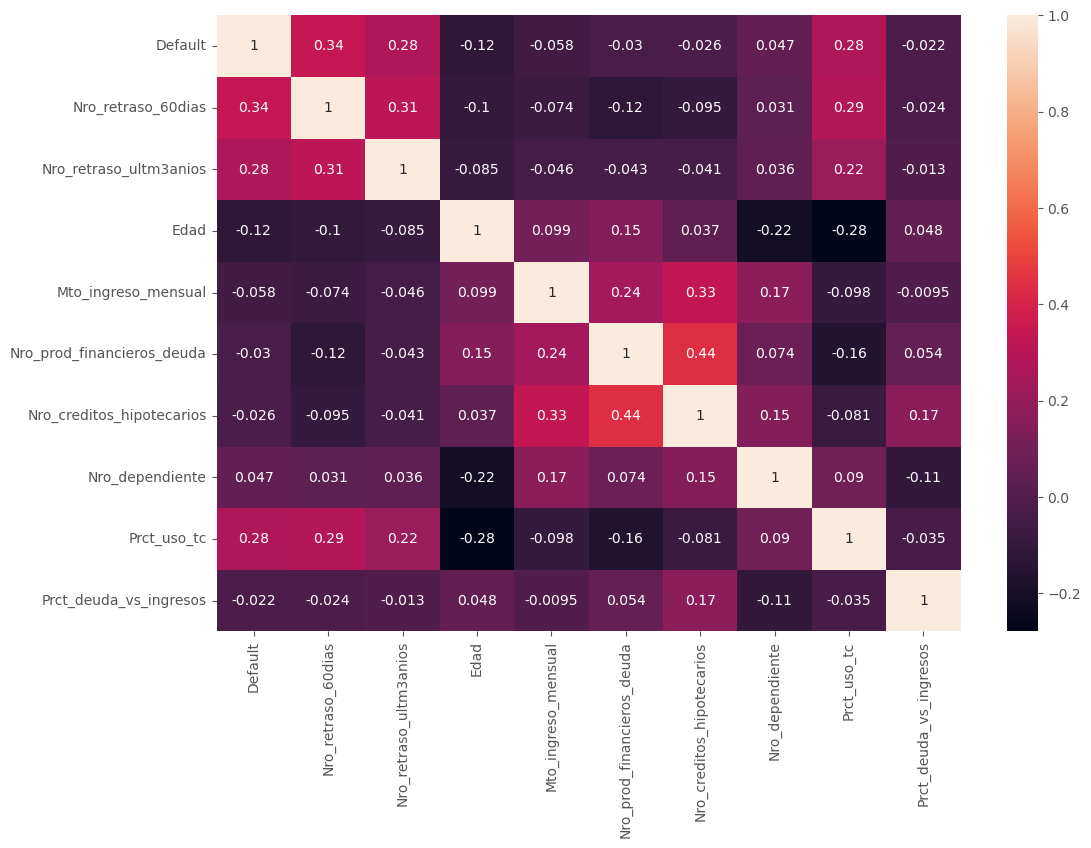

In [286]:
#VISUALIZAR EL MAPA DE CALOR CON LA CORRELACIÓN DE CADA VARIABLE DEL DATASET
corr = df_creditos[['Default', 'Nro_retraso_60dias', 'Nro_retraso_ultm3anios', 'Edad','Mto_ingreso_mensual','Nro_prod_financieros_deuda','Nro_creditos_hipotecarios','Nro_dependiente','Prct_uso_tc','Prct_deuda_vs_ingresos']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

# **6. Agrupación por rangos para aplicación de Machine Learning**

In [287]:
# MAPPING 'Edad' DE LOS CLIENTES
df_creditos.loc[ df_creditos['Edad'] <= 24, 'EdadEncoded'] = 0
df_creditos.loc[(df_creditos['Edad'] > 24) & (df_creditos['Edad'] <= 40), 'EdadEncoded'] = 1
df_creditos.loc[(df_creditos['Edad'] > 40) & (df_creditos['Edad'] <= 60), 'EdadEncoded'] = 2
df_creditos.loc[(df_creditos['Edad'] > 60) & (df_creditos['Edad'] <= 80), 'EdadEncoded'] = 3
df_creditos.loc[ df_creditos['Edad'] > 80, 'EdadEncoded'] = 4

In [288]:
# MAPPING 'Nro_prestao_retrasados' DE LOS CLIENTES
df_creditos.loc[ df_creditos['Nro_prestao_retrasados'] <= 0, 'RetrasosEncoded'] = 0
df_creditos.loc[(df_creditos['Nro_prestao_retrasados'] > 0) & (df_creditos['Nro_prestao_retrasados'] <= 2), 'RetrasosEncoded'] = 1
df_creditos.loc[(df_creditos['Nro_prestao_retrasados'] > 2) & (df_creditos['Nro_prestao_retrasados'] <= 5), 'RetrasosEncoded'] = 2
df_creditos.loc[(df_creditos['Nro_prestao_retrasados'] > 5) & (df_creditos['Nro_prestao_retrasados'] <= 8), 'RetrasosEncoded'] = 3
df_creditos.loc[(df_creditos['Nro_prestao_retrasados'] > 8) & (df_creditos['Nro_prestao_retrasados'] <= 13), 'RetrasosEncoded'] = 4
df_creditos.loc[ df_creditos['Nro_prestao_retrasados'] > 13, 'RetrasosEncoded'] = 5

In [289]:
# MAPPING 'Nro_prod_financieros_deuda' DE LOS CLIENTES
df_creditos.loc[ df_creditos['Nro_prod_financieros_deuda'] <= 0, 'FinancierosEncoded'] = 0
df_creditos.loc[(df_creditos['Nro_prod_financieros_deuda'] > 0) & (df_creditos['Nro_prod_financieros_deuda'] <= 15), 'FinancierosEncoded'] = 1
df_creditos.loc[(df_creditos['Nro_prod_financieros_deuda'] > 15) & (df_creditos['Nro_prod_financieros_deuda'] <= 25), 'FinancierosEncoded'] = 2
df_creditos.loc[(df_creditos['Nro_prod_financieros_deuda'] > 25) & (df_creditos['Nro_prod_financieros_deuda'] <= 35), 'FinancierosEncoded'] = 3
df_creditos.loc[(df_creditos['Nro_prod_financieros_deuda'] > 35) & (df_creditos['Nro_prod_financieros_deuda'] <= 45), 'FinancierosEncoded'] = 4
df_creditos.loc[ df_creditos['Nro_prod_financieros_deuda'] > 45, 'FinancierosEncoded'] = 5

In [290]:
# MAPPING 'Nro_retraso_60dias' DE LOS CLIENTES
df_creditos.loc[ df_creditos['Nro_retraso_60dias'] <= 0, '60Enconded'] = 0
df_creditos.loc[(df_creditos['Nro_retraso_60dias'] > 0) & (df_creditos['Nro_retraso_60dias'] <= 3), '60Enconded'] = 1
df_creditos.loc[(df_creditos['Nro_retraso_60dias'] > 3) & (df_creditos['Nro_retraso_60dias'] <= 7), '60Enconded'] = 2
df_creditos.loc[(df_creditos['Nro_retraso_60dias'] > 7) & (df_creditos['Nro_retraso_60dias'] <= 12), '60Enconded'] = 3
df_creditos.loc[(df_creditos['Nro_retraso_60dias'] > 12) & (df_creditos['Nro_retraso_60dias'] <= 15), '60Enconded'] = 4
df_creditos.loc[ df_creditos['Nro_retraso_60dias'] > 15, '60Enconded'] = 5

In [291]:
# MAPPING 'Nro_creditos_hipotecarios' DE LOS CLIENTES
df_creditos.loc[ df_creditos['Nro_creditos_hipotecarios'] <= 0, 'HipEnconded'] = 0
df_creditos.loc[(df_creditos['Nro_creditos_hipotecarios'] > 0) & (df_creditos['Nro_creditos_hipotecarios'] <= 3), 'HipEnconded'] = 1
df_creditos.loc[(df_creditos['Nro_creditos_hipotecarios'] > 3) & (df_creditos['Nro_creditos_hipotecarios'] <= 7), 'HipEnconded'] = 2
df_creditos.loc[(df_creditos['Nro_creditos_hipotecarios'] > 7) & (df_creditos['Nro_creditos_hipotecarios'] <= 15), 'HipEnconded'] = 3
df_creditos.loc[(df_creditos['Nro_creditos_hipotecarios'] > 15) & (df_creditos['Nro_creditos_hipotecarios'] <= 25), 'HipEnconded'] = 4
df_creditos.loc[ df_creditos['Nro_creditos_hipotecarios'] > 25, 'HipEnconded'] = 5

In [292]:
# MAPPING 'Nro_dependiente' DE LOS CLIENTES
df_creditos.loc[ df_creditos['Nro_dependiente'] <= 0, 'DepEncoded'] = 0
df_creditos.loc[(df_creditos['Nro_dependiente'] > 0) & (df_creditos['Nro_dependiente'] <= 2), 'DepEncoded'] = 1
df_creditos.loc[(df_creditos['Nro_dependiente'] > 2) & (df_creditos['Nro_dependiente'] <= 5), 'DepEncoded'] = 2
df_creditos.loc[(df_creditos['Nro_dependiente'] > 5) & (df_creditos['Nro_dependiente'] <= 10), 'DepEncoded'] = 3
df_creditos.loc[(df_creditos['Nro_dependiente'] > 10) & (df_creditos['Nro_dependiente'] <= 13), 'DepEncoded'] = 4
df_creditos.loc[ df_creditos['Nro_dependiente'] > 13, 'DepEncoded'] = 5

In [293]:
# MAPPING 'Prct_uso_tc' DE LOS CLIENTES
df_creditos.loc[ df_creditos['Prct_uso_tc'] <= 0.1, 'TCEncoded'] = 0
df_creditos.loc[(df_creditos['Prct_uso_tc'] > 0.1) & (df_creditos['Prct_uso_tc'] <= 0.5), 'TCEncoded'] = 1
df_creditos.loc[(df_creditos['Prct_uso_tc'] > 0.5) & (df_creditos['Prct_uso_tc'] <= 1.0), 'TCEncoded'] = 2
df_creditos.loc[(df_creditos['Prct_uso_tc'] > 1.0) & (df_creditos['Prct_uso_tc'] <= 1.5), 'TCEncoded'] = 3
df_creditos.loc[(df_creditos['Prct_uso_tc'] > 1.5) & (df_creditos['Prct_uso_tc'] <= 2.0), 'TCEncoded'] = 4
df_creditos.loc[ df_creditos['Prct_uso_tc'] > 2.0, 'TCEncoded'] = 5

In [294]:
# MAPPING 'Prct_deuda_vs_ingresos' DE LOS CLIENTES
df_creditos.loc[ df_creditos['Prct_deuda_vs_ingresos'] <= 0.1, 'DeuInEncoded'] = 0
df_creditos.loc[(df_creditos['Prct_deuda_vs_ingresos'] > 0.1) & (df_creditos['Prct_deuda_vs_ingresos'] <= 0.5), 'DeuInEncoded'] = 1
df_creditos.loc[(df_creditos['Prct_deuda_vs_ingresos'] > 0.5) & (df_creditos['Prct_deuda_vs_ingresos'] <= 1.0), 'DeuInEncoded'] = 2
df_creditos.loc[(df_creditos['Prct_deuda_vs_ingresos'] > 1.0) & (df_creditos['Prct_deuda_vs_ingresos'] <= 1.5), 'DeuInEncoded'] = 3
df_creditos.loc[(df_creditos['Prct_deuda_vs_ingresos'] > 1.5) & (df_creditos['Prct_deuda_vs_ingresos'] <= 2.0), 'DeuInEncoded'] = 4
df_creditos.loc[ df_creditos['Prct_deuda_vs_ingresos'] > 2.0, 'DeuInEncoded'] = 5

In [295]:
# MAPPING 'Mto_ingreso_mensual' DE LOS CLIENTES
df_creditos.loc[ df_creditos['Mto_ingreso_mensual'] <= 1000, 'IngresoEncoded'] = 0
df_creditos.loc[(df_creditos['Mto_ingreso_mensual'] > 1000) & (df_creditos['Mto_ingreso_mensual'] <= 3000), 'IngresoEncoded'] = 1
df_creditos.loc[(df_creditos['Mto_ingreso_mensual'] > 3000) & (df_creditos['Mto_ingreso_mensual'] <= 5000), 'IngresoEncoded'] = 2
df_creditos.loc[(df_creditos['Mto_ingreso_mensual'] > 5000) & (df_creditos['Mto_ingreso_mensual'] <= 8000), 'IngresoEncoded'] = 3
df_creditos.loc[(df_creditos['Mto_ingreso_mensual'] > 8000) & (df_creditos['Mto_ingreso_mensual'] <= 14000), 'IngresoEncoded'] = 4
df_creditos.loc[ df_creditos['Mto_ingreso_mensual'] > 14000, 'IngresoEncoded'] = 5

In [296]:
# MAPPING 'Nro_retraso_ultm3anios' DE LOS CLIENTES
df_creditos.loc[ df_creditos['Nro_retraso_ultm3anios'] <= 0, 'UltiEncoded'] = 0
df_creditos.loc[(df_creditos['Nro_retraso_ultm3anios'] > 0) & (df_creditos['Nro_retraso_ultm3anios'] <= 2), 'UltiEncoded'] = 1
df_creditos.loc[(df_creditos['Nro_retraso_ultm3anios'] > 2) & (df_creditos['Nro_retraso_ultm3anios'] <= 5), 'UltiEncoded'] = 2
df_creditos.loc[(df_creditos['Nro_retraso_ultm3anios'] > 5) & (df_creditos['Nro_retraso_ultm3anios'] <= 8), 'UltiEncoded'] = 3
df_creditos.loc[(df_creditos['Nro_retraso_ultm3anios'] > 8) & (df_creditos['Nro_retraso_ultm3anios'] <= 11), 'UltiEncoded'] = 4
df_creditos.loc[ df_creditos['Nro_retraso_ultm3anios'] > 11, 'UltiEncoded'] = 5

In [297]:
#ELIMINAR LOS CAMPOS Y REEMPLAZAR POR LOS RANGOS DEFINIDOS
drop_elements = ['Nro_prestao_retrasados', 'Nro_retraso_60dias', 'Nro_retraso_ultm3anios', 'Edad','Mto_ingreso_mensual','Nro_prod_financieros_deuda','Nro_creditos_hipotecarios','Nro_dependiente','Prct_uso_tc','Prct_deuda_vs_ingresos']
creditos_encoded = df_creditos.drop(drop_elements, axis = 1)

In [298]:
#VISUALIZAR LAS 5 PRIMERAS FILAS DEL DATASET ENCODED
creditos_encoded.head(10)

,ID,Default,EdadEncoded,RetrasosEncoded,FinancierosEncoded,60Enconded,HipEnconded,DepEncoded,TCEncoded,DeuInEncoded,IngresoEncoded,UltiEncoded
0,1,1,2.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,4.0,0.0
1,2,0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0
2,3,0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0
3,4,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
4,5,0,2.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,5.0,0.0
5,6,0,3.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0
6,7,0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,5.0,3.0,0.0
7,8,0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0
8,9,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,3.0,0.0
9,10,0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,5.0,0.0


In [299]:
creditos_encoded.to_csv("../data/processed/creditos_encoded.csv")

In [300]:
#VISUALIZAR EL DETALLE ESTADÍSTICO DEL DATASET ENCODED
creditos_encoded.describe()

,ID,Default,EdadEncoded,RetrasosEncoded,FinancierosEncoded,60Enconded,HipEnconded,DepEncoded,TCEncoded,DeuInEncoded,IngresoEncoded,UltiEncoded
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,2.085493,0.159880,1.088187,0.055587,0.625413,0.485053,0.845893,1.866847,2.686120,0.050693
std,43301.414527,0.249746,0.816881,0.366496,0.353870,0.229123,0.484018,0.658984,0.825148,1.734344,1.156884,0.219371
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
50%,75000.500000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,0.000000
75%,112500.250000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,4.000000,0.000000
max,150000.000000,1.000000,4.000000,1.000000,5.000000,1.000000,1.000000,5.000000,2.000000,5.000000,5.000000,1.000000


<Axes: title={'center': 'Pearson Correlation of Features'}>

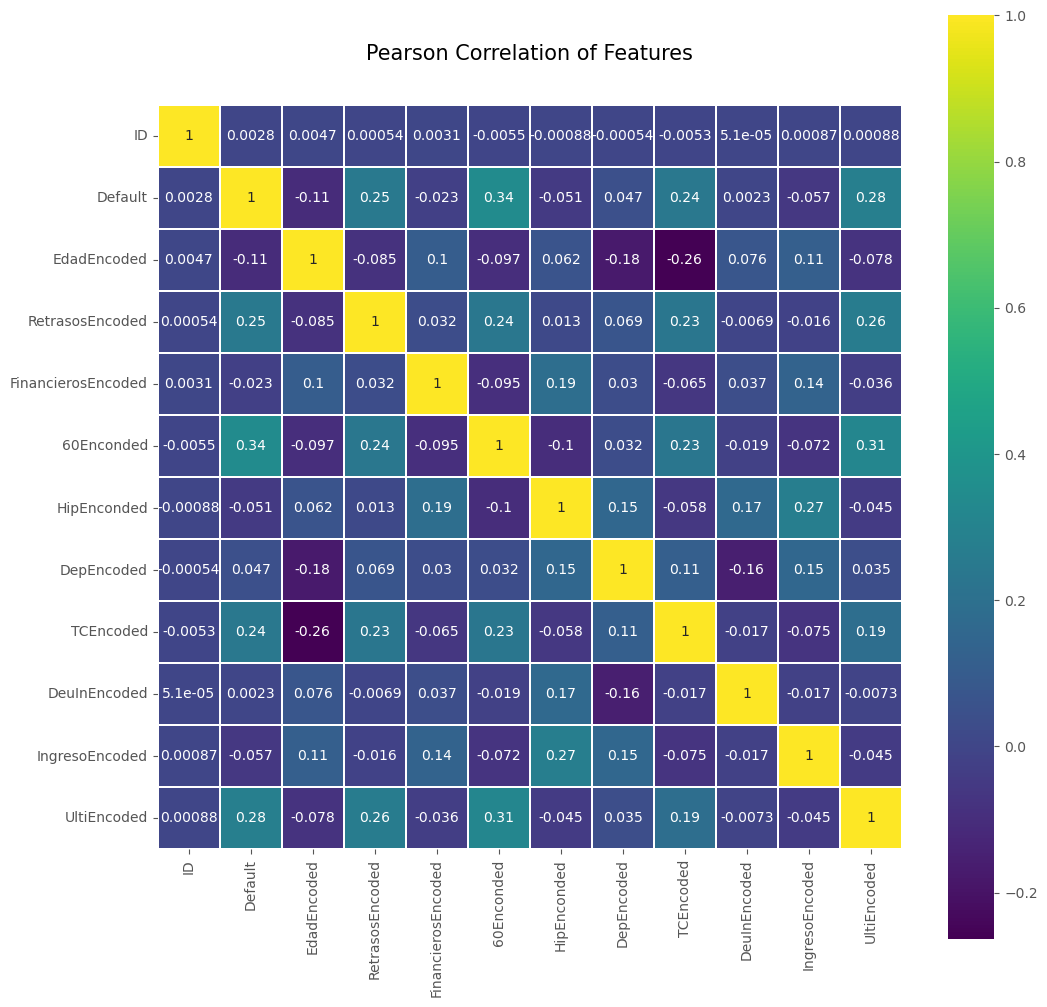

In [301]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(creditos_encoded.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [302]:
from sklearn.feature_selection import SelectKBest

# **7. Aplicación del SelectBest**

In [303]:
#VISUALIZAR LAS MEJORES VARIABLES
X=creditos_encoded.drop(['Default'], axis=1)
y=creditos_encoded['Default']

best=SelectKBest(k=3)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['RetrasosEncoded', '60Encoded', 'UltiEncoded'], dtype='object')

Index(['RetrasosEncoded', '60Enconded', 'UltiEncoded'], dtype='object')


Index(['RetrasosEncoded', '60Encoded', 'UltiEncoded'], dtype='object')

In [304]:
#USO DEL SELECTKBEST CON 'Nro_retraso_60dias'
creditos_encoded[['60Enconded', 'Default']].groupby(['60Enconded'], as_index=False).agg(['mean', 'count', 'sum'])

Default              
                mean   count   sum
60Enconded                        
0.0         0.046265  141662  6554
1.0         0.416407    8338  3472

In [305]:
#USO DEL SELECTKBEST CON 'Nro_retraso_ultm3anios'
creditos_encoded[['UltiEncoded', 'Default']].groupby(['UltiEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

Default              
                 mean   count   sum
UltiEncoded                        
0.0          0.050956  142396  7256
1.0          0.364282    7604  2770

In [306]:
#USO DEL SELECTKBEST CON 'Edad'
creditos_encoded[['EdadEncoded', 'Default']].groupby(['EdadEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

Default             
                 mean  count   sum
EdadEncoded                       
0.0          0.104578   2075   217
1.0          0.103476  33022  3417
2.0          0.072190  69843  5042
3.0          0.031153  40124  1250
4.0          0.020259   4936   100

In [307]:
#USO DEL SELECTKBEST CON 'Mto_ingreso_mensual'
creditos_encoded[['IngresoEncoded', 'Default']].groupby(['IngresoEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

Default             
                    mean  count   sum
IngresoEncoded                       
0.0             0.057260   3161   181
1.0             0.096916  22050  2137
2.0             0.076615  39496  3026
3.0             0.060793  45992  2796
4.0             0.047968  32605  1564
5.0             0.048088   6696   322

In [308]:
#USO DEL SELECTKBEST CON 'Nro_prod_financieros_deuda'
creditos_encoded[['FinancierosEncoded', 'Default']].groupby(['FinancierosEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

Default              
                        mean   count   sum
FinancierosEncoded                        
0.0                 0.256356    1888   484
1.0                 0.063946  134286  8587
2.0                 0.068338   12687   867
3.0                 0.072549    1020    74
4.0                 0.103448      87     9
5.0                 0.156250      32     5

In [309]:
#USO DEL SELECTKBEST CON 'Nro_creditos_hipotecarios'
creditos_encoded[['HipEnconded', 'Default']].groupby(['HipEnconded'], as_index=False).agg(['mean', 'count', 'sum'])

Default             
                 mean  count   sum
HipEnconded                       
0.0          0.083149  56188  4672
1.0          0.057072  93812  5354

In [310]:
#USO DEL SELECTKBEST CON 'Nro_dependiente'
creditos_encoded[['DepEncoded', 'Default']].groupby(['DepEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

Default             
                mean  count   sum
DepEncoded                       
0.0         0.058067  90826  5274
1.0         0.076770  45838  3519
2.0         0.091819  13091  1202
3.0         0.127572    243    31
4.0         0.000000      1     0
5.0         0.000000      1     0

In [311]:
#USO DEL SELECTKBEST CON 'Prct_uso_tc'
creditos_encoded[['TCEncoded', 'Default']].groupby(['TCEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

Default             
               mean  count   sum
TCEncoded                       
0.0        0.018104  64404  1166
1.0        0.041099  44308  1821
2.0        0.170485  41288  7039

In [312]:
#USO DEL SELECTKBEST CON 'Prct_deuda_vs_ingresos'
creditos_encoded[['DeuInEncoded', 'Default']].groupby(['DeuInEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

Default             
                  mean  count   sum
DeuInEncoded                       
0.0           0.059299  24520  1454
1.0           0.060719  69188  4201
2.0           0.098322  21155  2080
3.0           0.134791   3064   413
4.0           0.122568   1028   126
5.0           0.056434  31045  1752

# **8. Método de Balance de Datos - Under Sampling**

In [313]:
#LIBRERÍAS PARA TRATAMIENTO, MODELADO Y EVALUACIÓN DE DATOS
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_val_score

In [314]:
#DIMENSIONALIDAD DEL DATASET
creditos_encoded.shape

(150000, 12)

In [315]:
#CAMBIAR EL TIPO DE DATO Y SOBREESCRIBIR
creditos_encoded=creditos_encoded.astype(float).round(2)  #int

In [316]:
#ELIMINAR COLUMNA
creditos_encoded.drop(['ID'], axis='columns', inplace=True)

In [317]:
#ASIGNACIÓN DEL DATASET
data = creditos_encoded

In [318]:
#COLUMNAS
data.columns

Index(['Default', 'EdadEncoded', 'RetrasosEncoded', 'FinancierosEncoded',
       '60Enconded', 'HipEnconded', 'DepEncoded', 'TCEncoded', 'DeuInEncoded',
       'IngresoEncoded', 'UltiEncoded'],
      dtype='object')

In [319]:
#IDENTIFICANDO LOS VALORES NULOS
data.isnull().sum().sort_values(ascending=False)

Default               0
EdadEncoded           0
RetrasosEncoded       0
FinancierosEncoded    0
60Enconded            0
HipEnconded           0
DepEncoded            0
TCEncoded             0
DeuInEncoded          0
IngresoEncoded        0
UltiEncoded           0
dtype: int64

Class 0 Intensidad_Normal: 139974
Class 1 Intensidad_Pico: 10026
Proporción: 13.96 : 1


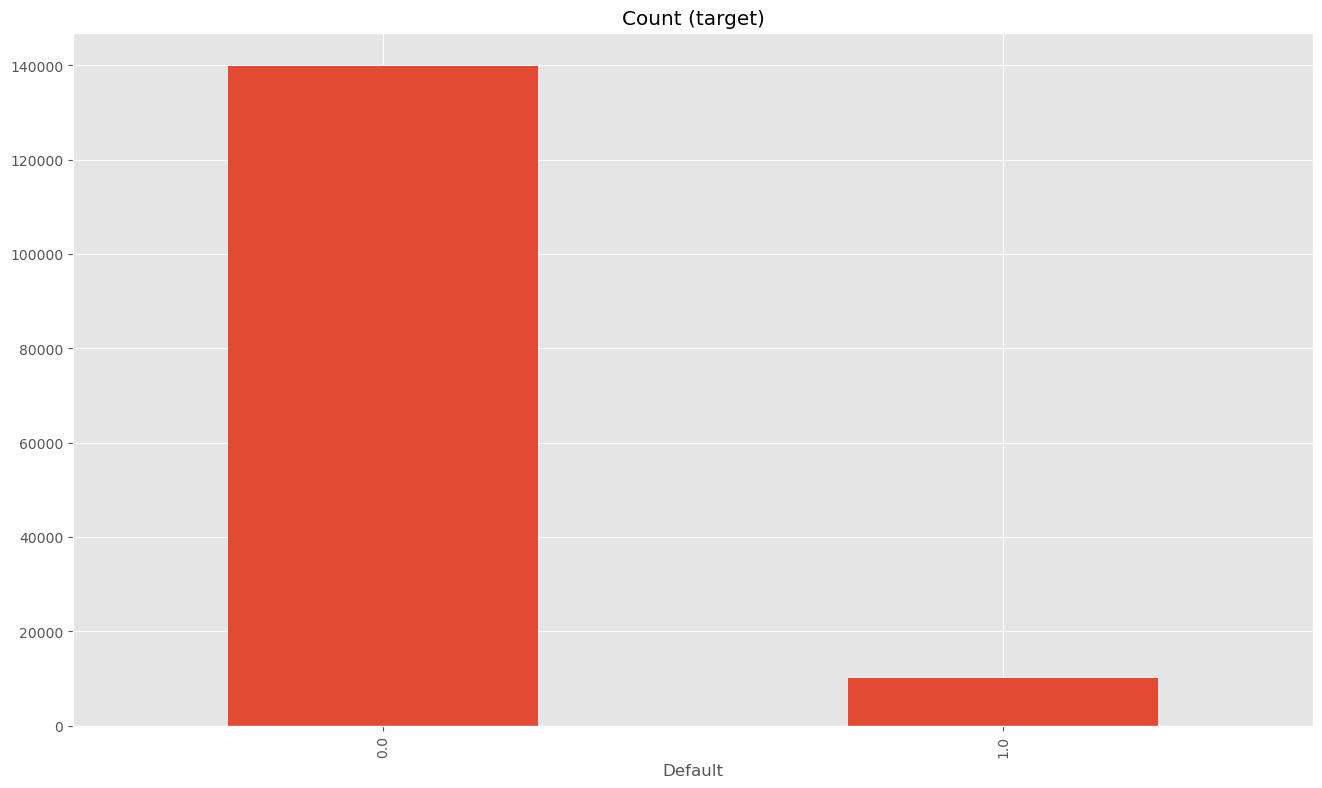

In [320]:
#DETECCIÓN DEL DESBALANCE DE MUESTRAS
target_count = data.Default.value_counts()
print('Class 0 Intensidad_Normal:', target_count[0])
print('Class 1 Intensidad_Pico:', target_count[1])
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

In [321]:
#SELECCIÓN DE UN 40% DE LOS DATOS PARA ESTUDIAR EL BENEFICIO DE LAS ESTRATEGIAS DE MUESTREO
X = data[['EdadEncoded', 'RetrasosEncoded', 'FinancierosEncoded', '60Enconded', 'HipEnconded', 'DepEncoded', 'TCEncoded', 'DeuInEncoded', 'IngresoEncoded', 'UltiEncoded']]
y = data[['Default']]

import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.40,random_state=42)

In [322]:
#USO DE DATOS DE ENTRENAMIENTO PARA LA ESTRATEGIA
df_train = pd.concat([X_train,y_train],axis=1)

In [323]:
df_train.to_csv("../data/processed/creditos_train.csv")

In [324]:
#USO DE DATOS DE ENTRENAMIENTO PARA LA ESTRATEGIA
df_test = pd.concat([X_test,y_test],axis=1)

In [325]:
df_test.to_csv("../data/processed/creditos_test.csv")

In [326]:
X_train.head()

,EdadEncoded,RetrasosEncoded,FinancierosEncoded,60Enconded,HipEnconded,DepEncoded,TCEncoded,DeuInEncoded,IngresoEncoded,UltiEncoded
78326,2.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0
96830,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0
41810,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0,0.0
60370,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
138901,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0


In [327]:
#DIVISIÓN ENTRE PERSONAS CON DEUDAS MAYOR A 90 DÍAS
count_class_0, count_class_1 = df_train.Default.value_counts()

#DIVIDIR POR CLASES
df_class_0 = df_train[df_train['Default'] == 0]
df_class_1 = df_train[df_train['Default'] == 1]

In [328]:
#CONTEO
count_class_0, len(df_class_0), count_class_1, len(df_class_1)

(83942, 83942, 6058, 6058)

In [329]:
#VISUALIZAR LAS 3 PRIMERAS COLUMNAS DE LA MUESTRA
df_class_0.sample(3)

,EdadEncoded,RetrasosEncoded,FinancierosEncoded,60Enconded,HipEnconded,DepEncoded,TCEncoded,DeuInEncoded,IngresoEncoded,UltiEncoded,Default
81610,2.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0
89027,3.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,4.0,0.0,0.0
118201,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0


Estrategia de Muestreo Under-Sampling:
Default
0.0    6058
1.0    6058
Name: count, dtype: int64


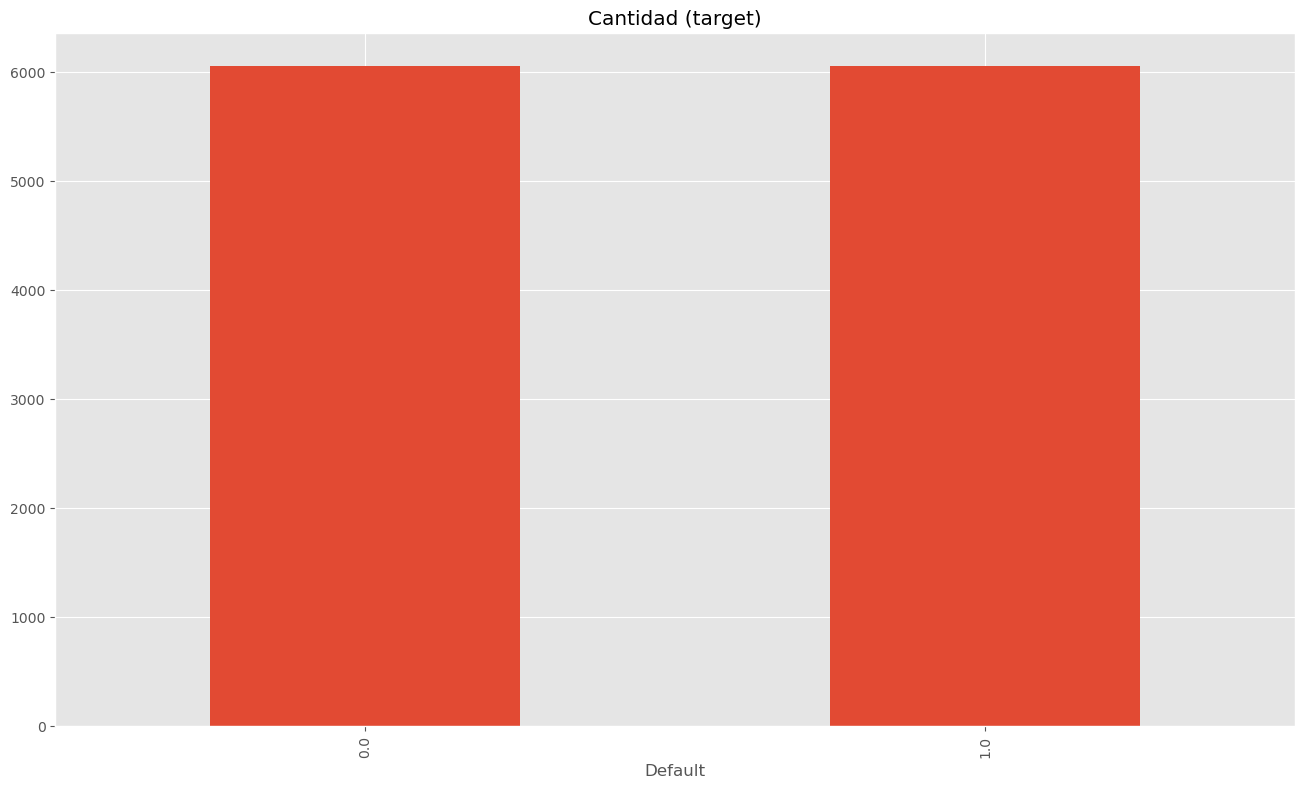

In [330]:
#APLICACIÓN DE UNDER SAMPLING
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Estrategia de Muestreo Under-Sampling:')
print(df_train_under.Default.value_counts())

df_train_under.Default.value_counts().plot(kind='bar', title='Cantidad (target)');

# **9. Evaluación de resultados de las estrategias de muestreo**

In [331]:
#DATOS ORIGINALES
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))

Accuracy DATOS ORIGINALES: 93.03%


Matriz de Confusión - DATOS ORIGINALES:
 [[55155   877]
 [ 3308   660]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     56032
         1.0       0.43      0.17      0.24      3968

    accuracy                           0.93     60000
   macro avg       0.69      0.58      0.60     60000
weighted avg       0.91      0.93      0.92     60000



/tmp/ipykernel_983/3918846835.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_983/3918846835.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


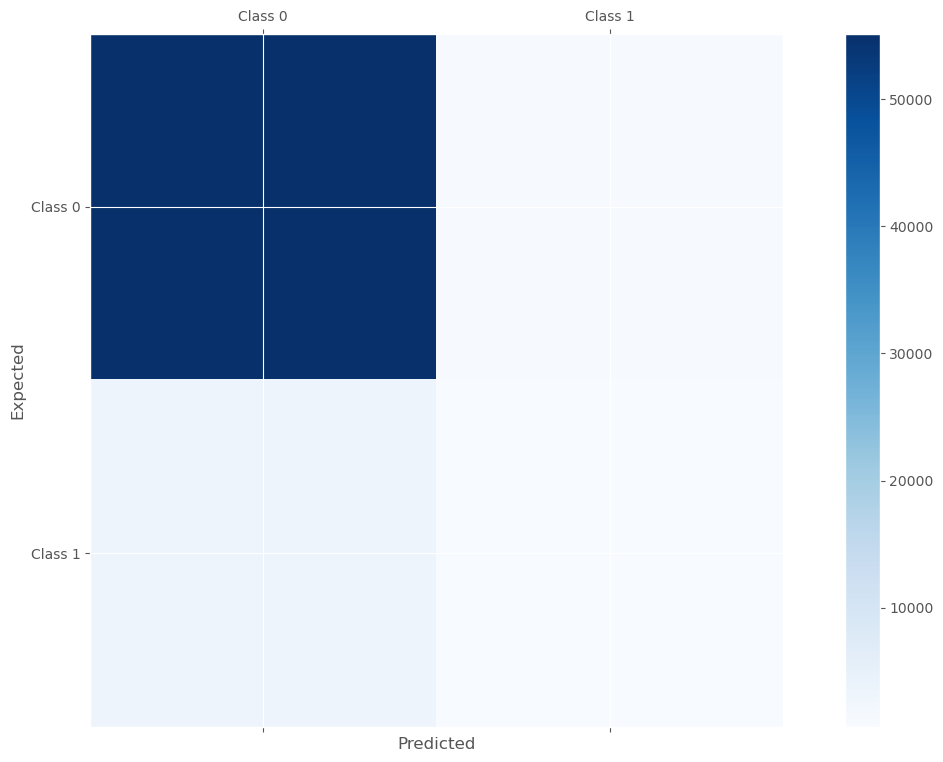

In [332]:
#IMPORTACIÓN DE LA MATRIZ DE CONFUSIÓN
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)

print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)

print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [333]:
#UNDER SAMPLING
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

X_train_u= df_train_under[['EdadEncoded', 'RetrasosEncoded', 'FinancierosEncoded', '60Enconded', 'HipEnconded', 'DepEncoded', 'TCEncoded', 'DeuInEncoded', 'IngresoEncoded', 'UltiEncoded']]
y_train_u = df_train_under[['Default']]

model.fit(X_train_u, y_train_u)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy UNDERSAMPLING: %.2f%%" % (accuracy * 100.0))

Accuracy UNDERSAMPLING: 78.65%


Matriz de Confusión UNDERSAMPLING:
 [[44510 11522]
 [ 1286  2682]]
Métricas de Matriz de Confusión - UNDERSAMPLING:
               precision    recall  f1-score   support

         0.0       0.97      0.79      0.87     56032
         1.0       0.19      0.68      0.30      3968

    accuracy                           0.79     60000
   macro avg       0.58      0.74      0.58     60000
weighted avg       0.92      0.79      0.84     60000



/tmp/ipykernel_983/1420359109.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_983/1420359109.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


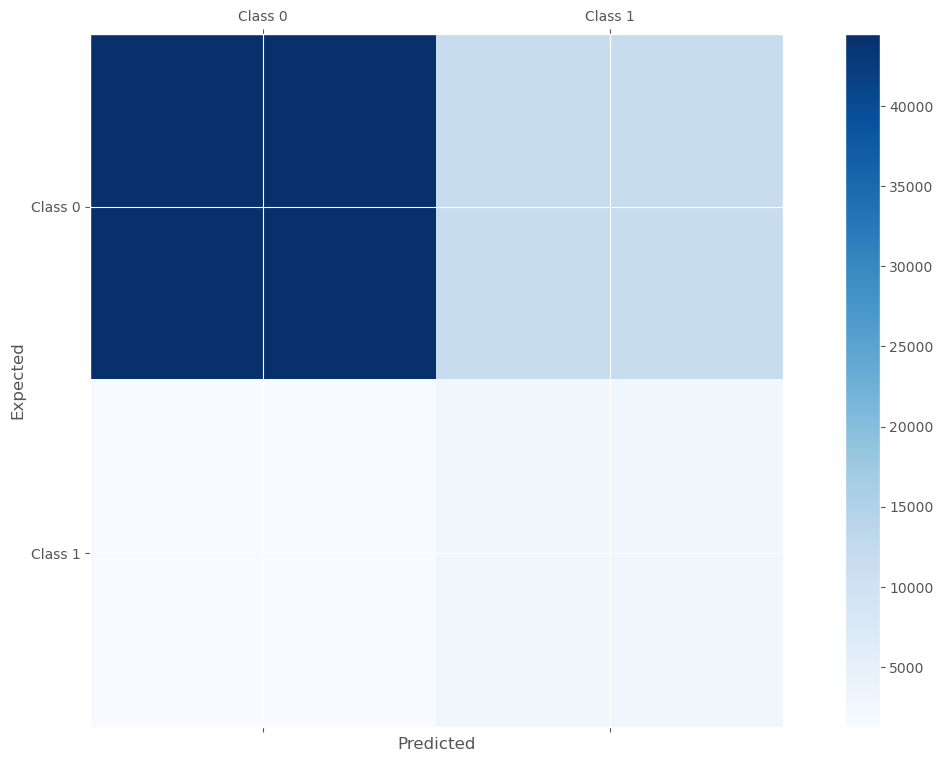

In [334]:
#IMPORTACIÓN DE LA MATRIZ DE CONFUSIÓN
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)

print('Matriz de Confusión UNDERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - UNDERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# **10. Evaluando los escenarios de modelamiento XGBoost**

In [335]:
#INSTALAR EL MODELAMIENTO XGBOOST
!pip install xgboost

In [336]:
#DENOMINAR EL MODELAMIENTO XGBOOST
import xgboost as xgb

In [337]:
#INSTALAR EL MODELAMIENTO CATBOOST
!pip install catboost

In [338]:
#DENOMINAR EL MODELAMIENTO CATBOOST
import catboost
from catboost import CatBoostClassifier

In [339]:
#IMPORTAR EL ALGORITMO RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

In [340]:
#DEFINICIÓN DEL MODELO 1
model1 = xgb.XGBClassifier()

In [341]:
#DEFINICIÓN DEL MODELO 2
model2 = xgb.XGBClassifier(n_estimators=20 , max_depth=8, learning_rate=0.1 , subsample=0.5)

In [342]:
#DEFINICIÓN DEL MODELO 3
model3 = CatBoostClassifier()

In [343]:
#DEFINICIÓN DEL MODELO 4
model4 = RandomForestClassifier()

In [344]:
#DEFINICIÓN DEL MODELO 5
model5 = RandomForestClassifier(n_estimators=20, max_depth=8)

In [345]:
#VISUALIZACIÓN DEL MODELO 1
model1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [346]:
#VISUALIZACIÓN DEL MODELO 2
model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=20,
              n_jobs=None, num_parallel_tree=None, ...)

In [347]:
#VISUALIZACIÓN DEL MODELO 3
model3.fit(X_train, y_train)

Learning rate set to 0.070371
0:	learn: 0.5944340	total: 31.7ms	remaining: 31.7s
1:	learn: 0.5170272	total: 46.3ms	remaining: 23.1s
2:	learn: 0.4495948	total: 59.8ms	remaining: 19.9s
3:	learn: 0.4067182	total: 71.1ms	remaining: 17.7s
4:	learn: 0.3652323	total: 90.8ms	remaining: 18.1s
5:	learn: 0.3302333	total: 108ms	remaining: 18s
6:	learn: 0.3049101	total: 121ms	remaining: 17.1s
7:	learn: 0.2823400	total: 129ms	remaining: 16s
8:	learn: 0.2668291	total: 137ms	remaining: 15.1s
9:	learn: 0.2521490	total: 145ms	remaining: 14.4s
10:	learn: 0.2421963	total: 153ms	remaining: 13.8s
11:	learn: 0.2329569	total: 161ms	remaining: 13.3s
12:	learn: 0.2257620	total: 171ms	remaining: 13s
13:	learn: 0.2186478	total: 179ms	remaining: 12.6s
14:	learn: 0.2126116	total: 191ms	remaining: 12.6s
15:	learn: 0.2079193	total: 205ms	remaining: 12.6s
16:	learn: 0.2038745	total: 227ms	remaining: 13.1s
17:	learn: 0.2009978	total: 245ms	remaining: 13.4s
18:	learn: 0.1987931	total: 258ms	remaining: 13.3s
19:	learn: 0

In [348]:
#VISUALIZACIÓN DEL MODELO 4
model4.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [349]:
#VISUALIZACIÓN DEL MODELO 5
model5.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=8, n_estimators=20)

In [350]:
#AGREGACIÓN DEL CLASIFICADOR DE ÁRBOL SIMPLE
from sklearn.tree import DecisionTreeClassifier

model6 = DecisionTreeClassifier()
model6.fit(X_train, y_train)

DecisionTreeClassifier()

In [351]:
#IMPORTE DE LA LIBRERIA SKLEARN
import sklearn
sklearn.__version__

'1.3.1'

In [352]:
#DEFINICIÓN DE LAS PREDICCIONES
from sklearn.metrics import classification_report

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)

In [353]:
#VISUALIZACIÓN DEL TEST DE LA PREDICCIÓN 1
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     56032
         1.0       0.54      0.17      0.26      3968

    accuracy                           0.94     60000
   macro avg       0.74      0.58      0.61     60000
weighted avg       0.92      0.94      0.92     60000



In [354]:
#VISUALIZACIÓN DEL TEST DE LA PREDICCIÓN 2
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     56032
         1.0       0.61      0.09      0.15      3968

    accuracy                           0.94     60000
   macro avg       0.78      0.54      0.56     60000
weighted avg       0.92      0.94      0.91     60000



In [355]:
#VISUALIZACIÓN DEL TEST DE LA PREDICCIÓN 3
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     56032
         1.0       0.54      0.17      0.26      3968

    accuracy                           0.94     60000
   macro avg       0.74      0.58      0.61     60000
weighted avg       0.92      0.94      0.92     60000



In [356]:
#VISUALIZACIÓN DEL TEST DE LA PREDICCIÓN 4
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     56032
         1.0       0.46      0.19      0.27      3968

    accuracy                           0.93     60000
   macro avg       0.70      0.59      0.61     60000
weighted avg       0.91      0.93      0.92     60000



In [357]:
#VISUALIZACIÓN DEL TEST DE LA PREDICCIÓN 5
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     56032
         1.0       0.62      0.12      0.20      3968

    accuracy                           0.94     60000
   macro avg       0.78      0.56      0.58     60000
weighted avg       0.92      0.94      0.92     60000



In [358]:
#VISUALIZACIÓN DEL TEST DE LA PREDICCIÓN 6
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     56032
         1.0       0.43      0.17      0.24      3968

    accuracy                           0.93     60000
   macro avg       0.69      0.58      0.60     60000
weighted avg       0.91      0.93      0.92     60000



In [359]:
#DENOMINACIÓN DEL DATASET CON LOS ALGORITMOS DE PREDICCIÓN
df_algoritmos = pd.DataFrame({'algorithm' : ['XGBoost','XGBoost Tuneado','Catboost','RF','RF Tuneado','Arbol de Decision'],
                   'precision' : [0.90, 0.91, 0.92,0.92,0.96,0.81],
                   'recall' : [0.80, 0.72, 0.78,0.79,0.69,0.79]})

In [360]:
#VISUALIZACIÓN DEL DATASET DE ALGORITMOS DE PREDICCIÓN
df_algoritmos

,algorithm,precision,recall
0,XGBoost,0.90,0.80
1,XGBoost Tuneado,0.91,0.72
2,Catboost,0.92,0.78
3,RF,0.92,0.79
4,RF Tuneado,0.96,0.69
5,Arbol de Decision,0.81,0.79


Matriz de Confusión MODELO GANADOR:
 [[55446   586]
 [ 3287   681]]
Métricas de Matriz de Confusión - MODELO GANADOR:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     56032
         1.0       0.62      0.12      0.20      3968

    accuracy                           0.94     60000
   macro avg       0.78      0.56      0.58     60000
weighted avg       0.92      0.94      0.92     60000



/tmp/ipykernel_983/1164581771.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_983/1164581771.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


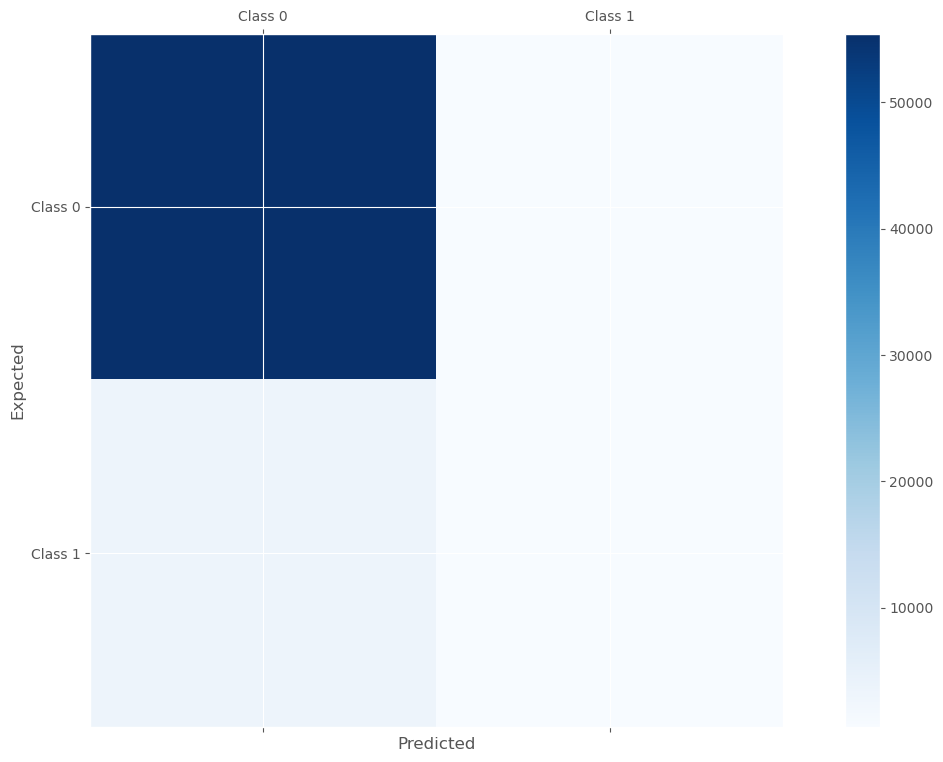

In [361]:
#IMPORTE DE LA MATRIZ DE CONFUSIÓN
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVALUANDO LA MATRIZ DE CONFUSION
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred1)

print('Matriz de Confusión MODELO GANADOR:\n', conf_mat)

print('Métricas de Matriz de Confusión - MODELO GANADOR:\n',classification_report(y_test,pred5))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [362]:
# Guardamos el mejor modelo entrenado para usarlo en la implementación
import pickle
filename = 'bestmodel.pkl'
pickle.dump(model5, open(filename, 'wb'))

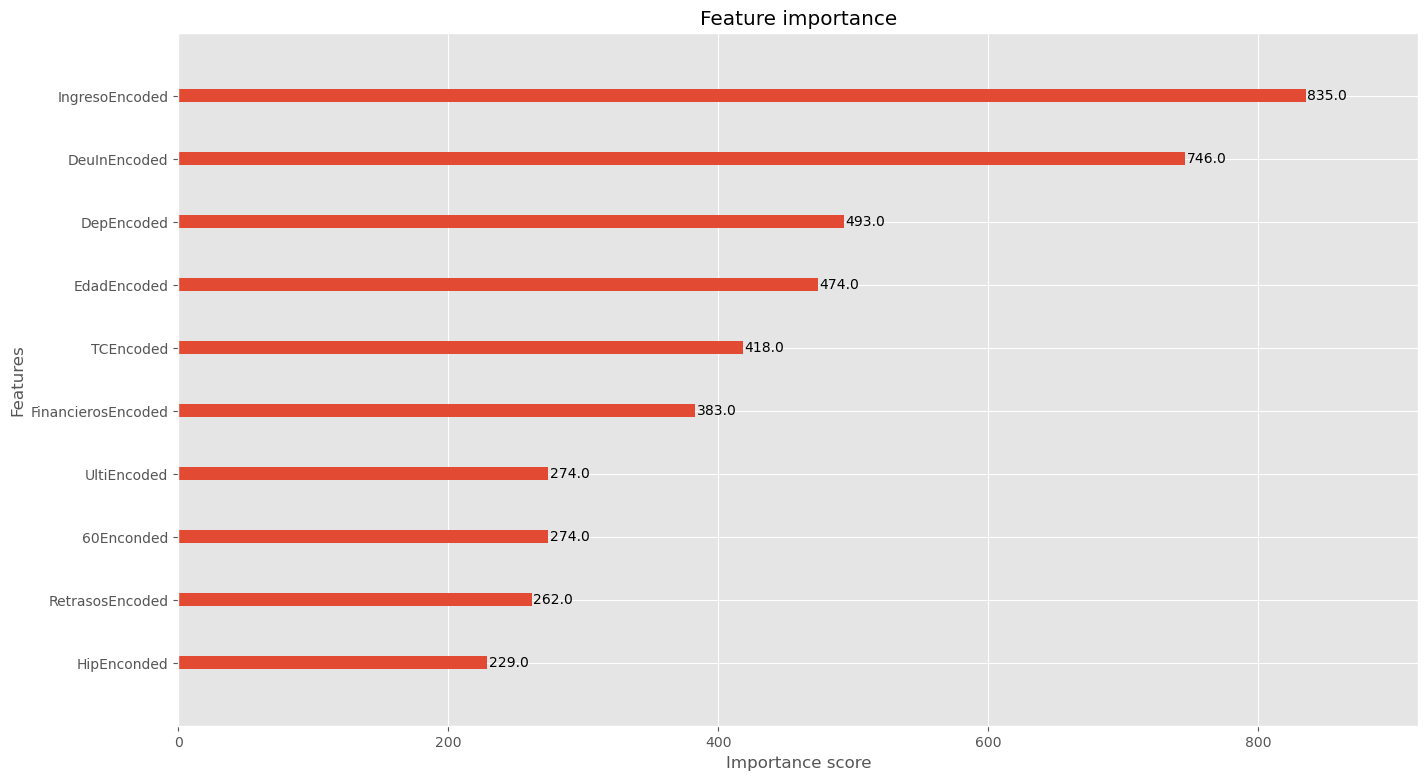

In [363]:
#VISUALIZACIÓN DE LAS CARACTERÍSTICAS DE LOS MODELOS
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(model1)
pyplot.show()